 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_returns_data_to_load =  Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_data_to_load, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(ascending = True, inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls 
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls and store in new dataframe 
whale_returns_df2 = whale_returns_df
whale_returns_df2.dropna(inplace=True)
whale_returns_df2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
# Checking if nulls were dropped 
whale_returns_df2.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns

algo_returns_data_to_load =  Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_data_to_load, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls and store in new dataframe 
algo_returns_df2 = algo_returns_df
algo_returns_df2.dropna(inplace=True)
algo_returns_df2.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [9]:
# Checking if nulls were dropped 
algo_returns_df2.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_data_to_load =  Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_data_to_load, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(ascending = True, inplace = True)

sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types

# remove "$" since it is not a numeric value before it can be converted to float 
sp500_history_df["Close"] = sp500_history_df['Close'].str.replace('$','').astype("float")

# Same as above. Alternative execution. the following will change the column to float no matter what and label nan for those it can't convert 
# sp500_history_df["Close"] = pd.to_numeric(sp500_history_df["Close"].str.replace('$',''),errors='coerce')

sp500_history_df.dtypes

/var/folders/b7/3738qq312ll_7p5d9yp3zbt00000gp/T/ipykernel_25110/2732782755.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df["Close"] = sp500_history_df['Close'].str.replace('$','').astype("float")


Close    float64
dtype: object

In [13]:
sp500_history_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [14]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_history_df.pct_change()
sp500_daily_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Drop nulls and store in new dataframe 
sp500_daily_returns_df2 = sp500_daily_returns_df
sp500_daily_returns_df2.dropna(inplace=True)
sp500_daily_returns_df2.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns_df2.rename(columns = {"Close":"SP500"}, inplace = True)
sp500_daily_returns_df2.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combo_daily_df = pd.concat([whale_returns_df2, algo_returns_df2,sp500_daily_returns_df2], axis = "columns",join = "inner")
combo_daily_df.sort_index(ascending = True, inplace = True)

combo_daily_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

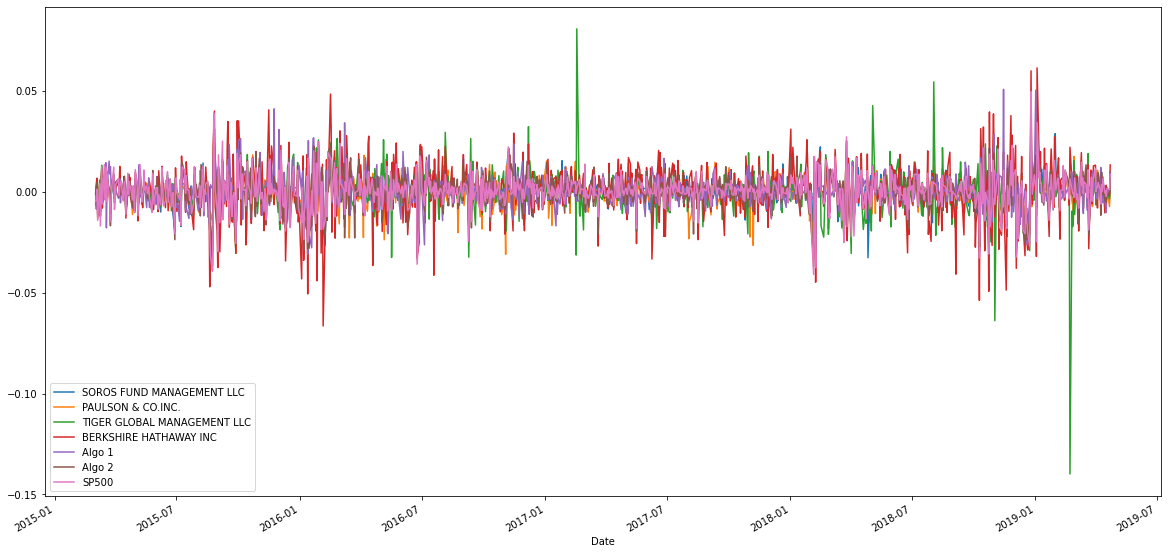

In [18]:
# Plot daily returns of all portfolios
combo_daily_df.plot(figsize = (20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

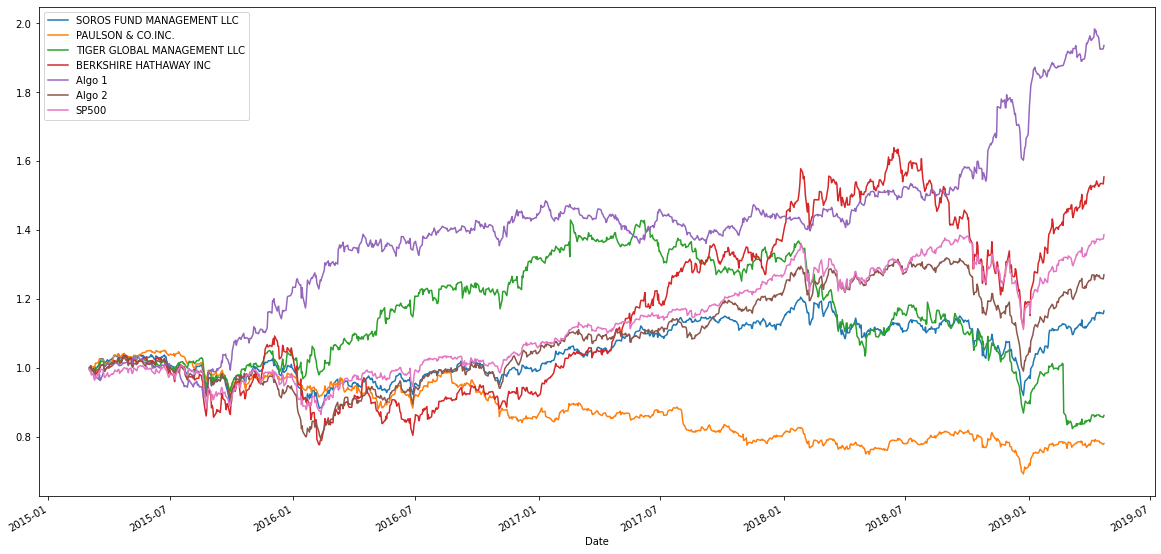

In [19]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
cum_daily_df = (1+ combo_daily_df).cumprod()
cum_daily_df.plot(figsize = (20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

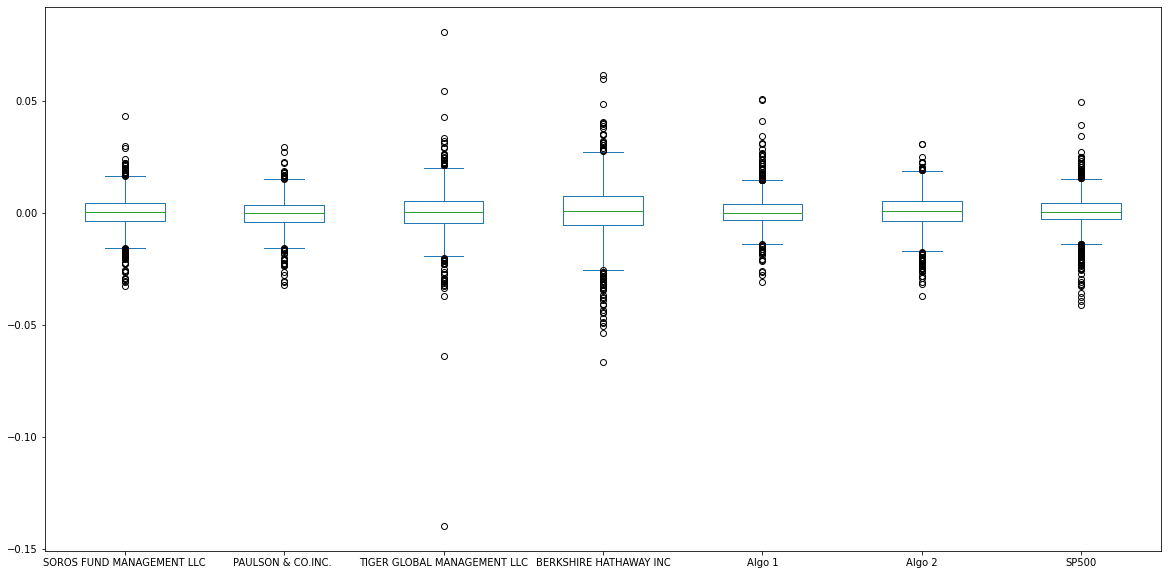

In [20]:
# Box plot to visually show risk
combo_daily_df.plot(kind = "box", figsize = (20,10) )

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
combo_daily_std_df = pd.DataFrame(combo_daily_df.std()).rename(columns = {0:"STD"})
combo_daily_std_df


,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
SP500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
risk_portfolios_df = combo_daily_std_df[combo_daily_std_df["STD"] > combo_daily_std_df.loc["SP500", "STD"]]

risk_portfolios_df

,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_df = combo_daily_std_df*np.sqrt(252)
annualized_std_df

,STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
SP500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21_std = combo_daily_df[["SP500"]].rolling(window = 21).std()
sp500_rolling_21_std.tail()

,SP500
Date,
2019-04-16,0.006498
2019-04-17,0.006537
2019-04-18,0.006470
2019-04-22,0.006094
2019-04-23,0.004325


<AxesSubplot:xlabel='Date'>

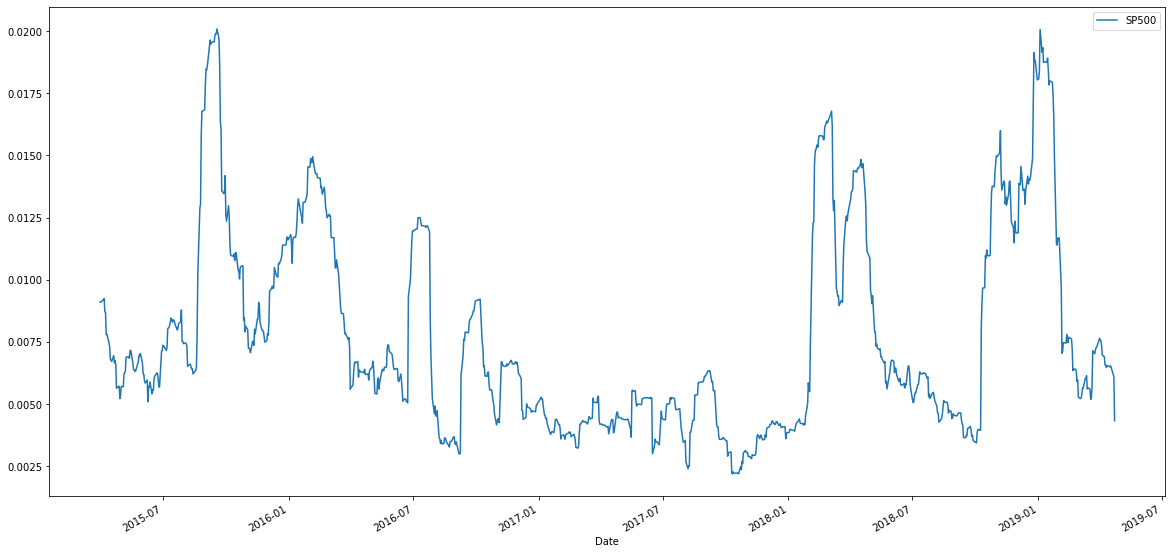

In [25]:
# Plot the rolling standard deviation
sp500_rolling_21_std.plot(figsize = (20,10))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = combo_daily_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

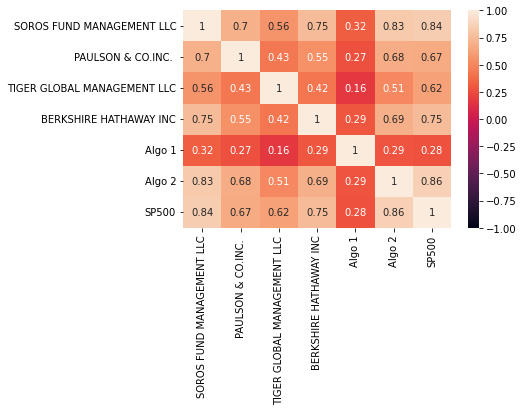

In [27]:
#Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single portfolio

covariance = combo_daily_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combo_daily_df["SP500"])

# Calculate variance of S&P 500
variance = combo_daily_df["SP500"].rolling(window=60).var()

# Computing beta
algo1_beta = covariance / variance
algo1_beta


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
Length: 1043, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta'}, xlabel='Date'>

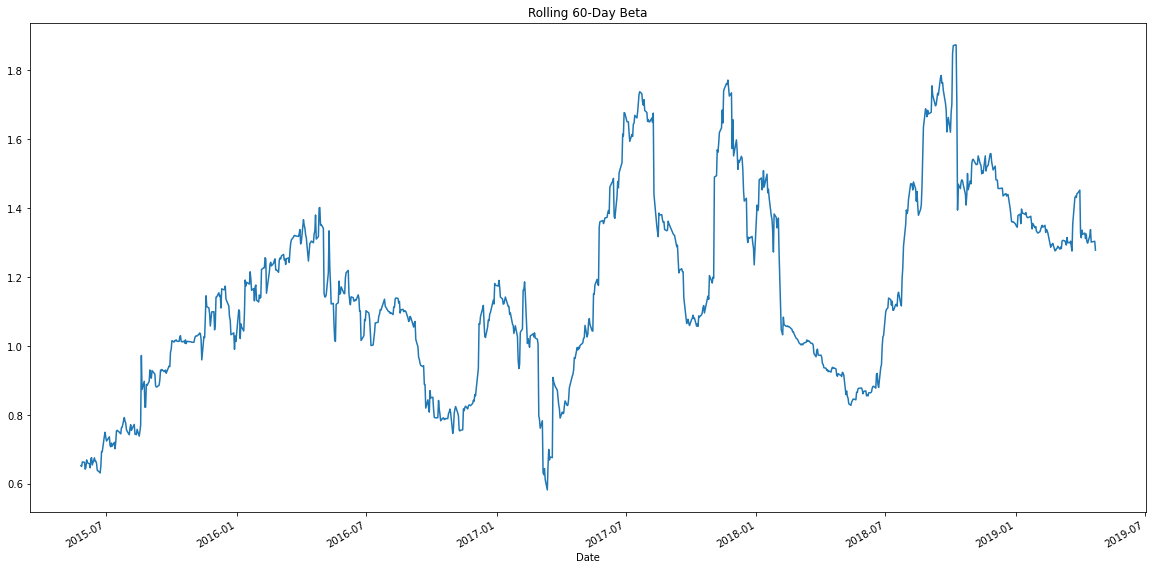

In [29]:
# Plot beta trend
algo1_beta.plot(figsize=(20,10), title ="Rolling 60-Day Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

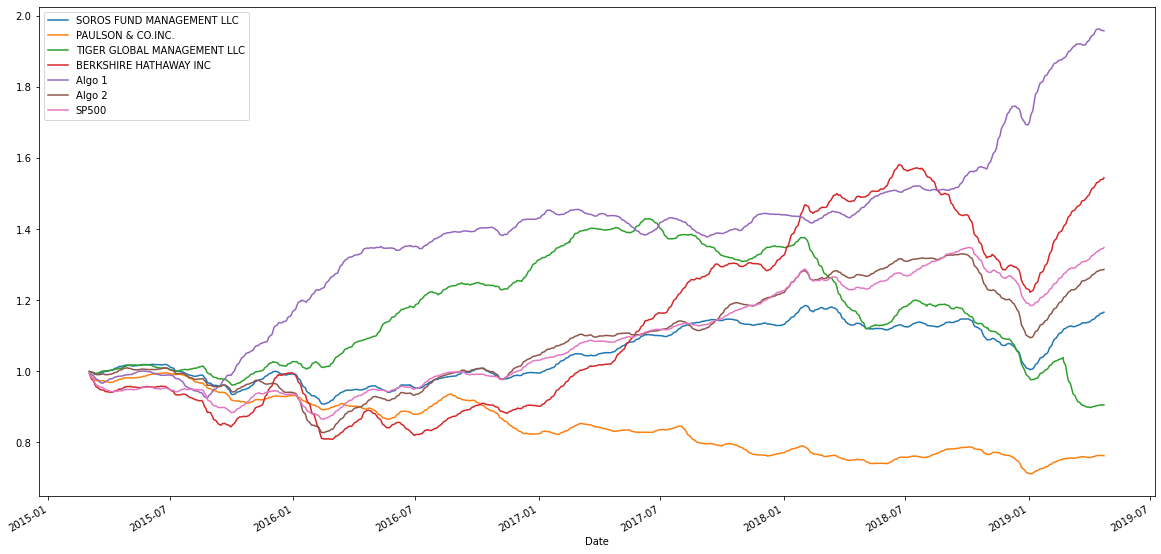

In [30]:
# Use `ewm` to calculate the rolling window
combo_daily_ewm_df = combo_daily_df.ewm(span = 21,adjust = False).mean()
(1+combo_daily_ewm_df).cumprod().plot(figsize = (20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = combo_daily_df.mean()*252/(combo_daily_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

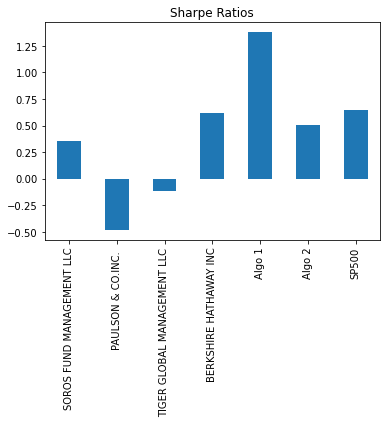

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### It looks like Algo 1 is beating all other portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock
apple_data_to_load =  Path("Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple_data_to_load, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
apple_df.sort_index(ascending = True, inplace = True)
apple_df.rename(columns = {"NOCP":"AAPL"}, inplace = True)
apple_df.head()

,Symbol,AAPL
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [35]:
# Reading data from 2nd stock
google_data_to_load =  Path("Resources/goog_historical.csv")
google_df = pd.read_csv(apple_data_to_load, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
google_df.sort_index(ascending = True, inplace = True)
google_df.rename(columns = {"NOCP":"GOOG"}, inplace = True)
google_df.head()

,Symbol,GOOG
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [36]:
# Reading data from 3rd stock
costco_data_to_load =  Path("Resources/cost_historical.csv")
costco_df = pd.read_csv(apple_data_to_load, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
costco_df.sort_index(ascending = True, inplace = True)
costco_df.rename(columns = {"NOCP":"COST"}, inplace = True)
costco_df.head()

,Symbol,COST
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [55]:
# Dropped column since it is not needed 
apple_df = apple_df.drop(columns=["Symbol"])
google_df = google_df.drop(columns=["Symbol"])
costco_df = costco_df.drop(columns=["Symbol"])

In [56]:
# Combine all stocks in a single DataFrame. Reorganize portfolio data by having a column per symbol. # Reset Date index

combo_stocks_df = pd.concat((apple_df, google_df, costco_df), axis = 1, join= "inner")
combo_stocks_df.sort_index(ascending = True, inplace = True)
combo_stocks_df.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,188.59,188.59
2018-05-14,188.15,188.15,188.15
2018-05-15,186.44,186.44,186.44
2018-05-16,188.18,188.18,188.18
2018-05-17,186.99,186.99,186.99


In [60]:
# Calculate daily returns. Drop NAs
# Display sample data
combo_stocks_df.dropna(inplace=True)
combo_stocks_df.isnull().sum()

AAPL    0
GOOG    0
COST    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [61]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

custom_portfolio_df = combo_stocks_df.dot(weights)
custom_portfolio_returns_df = custom_portfolio_df.pct_change()
custom_portfolio_returns_df.dropna(inplace = True)

# Display sample data
custom_portfolio_returns_df.head()

Trade DATE
2018-05-14   -0.002333
2018-05-15   -0.009088
2018-05-16    0.009333
2018-05-17   -0.006324
2018-05-18   -0.003637
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [67]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns_df = pd.concat((custom_portfolio_returns_df, combo_daily_df), axis = 1, join = "inner")
all_portfolio_returns_df.rename(columns = {0:"custom_portfolio"}, inplace = True)
all_portfolio_returns_df.head()

,custom_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,-0.002333,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.009088,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009333,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.006324,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.003637,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [68]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns_df.dropna(inplace=True)
all_portfolio_returns_df.isnull().sum()

custom_portfolio               0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(all_portfolio_returns_df.std()).rename(columns = {0:"STD"})
portfolio_std

,STD
custom_portfolio,0.018706
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
SP500,0.009578


### Calculate and plot rolling `std` with 21-day window

In [72]:
# Calculate rolling standard deviation
all_risk_std = portfolio_std[portfolio_std["STD"] > portfolio_std.loc["SP500", "STD"]]
all_risk_std


,STD
custom_portfolio,0.018706
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569


<AxesSubplot:>

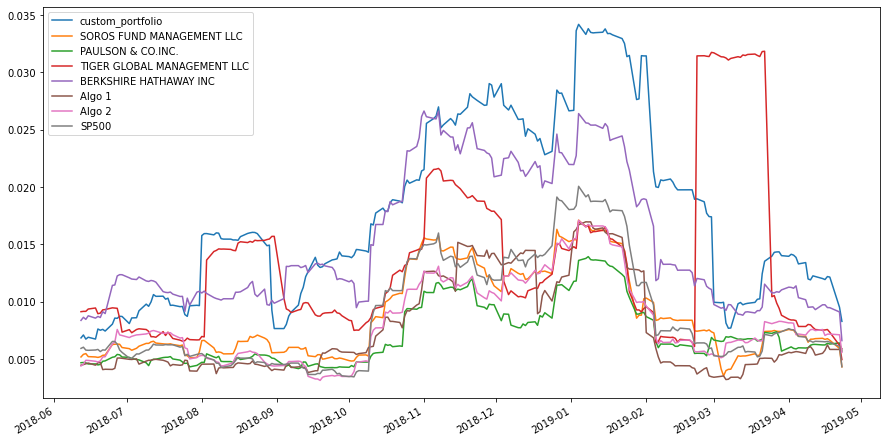

In [73]:
# Plot rolling standard deviation

all_portfolio_returns_df.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot the correlation

In [74]:
# Calculate and plot the correlation
correlation_custom_portfolio = all_portfolio_returns_df.corr().loc[:,"custom_portfolio"]
correlation_custom_portfolio[
    correlation_custom_portfolio==correlation_custom_portfolio[correlation_custom_portfolio<1].max()]

SP500    0.759909
Name: custom_portfolio, dtype: float64

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [77]:
# Calculate and plot Beta
custom_covariance = all_portfolio_returns_df["custom_portfolio"].rolling(window=60).cov(all_portfolio_returns_df["SP500"])

# Calculate variance of S&P 500
custom_variance = all_portfolio_returns_df["SP500"].rolling(window=60).var()

# Computing beta
custom_beta = custom_covariance / custom_variance
custom_beta.tail()


2019-04-16    1.579042
2019-04-17    1.527550
2019-04-18    1.528001
2019-04-22    1.526811
2019-04-23    1.466646
dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [78]:
# Calculate Annualized Sharpe Ratios
trading_days = all_portfolio_returns_df.count()
sharpe_ratios = all_portfolio_returns_df.mean()*trading_days/(all_portfolio_returns_df.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'sharpe ratios'}>

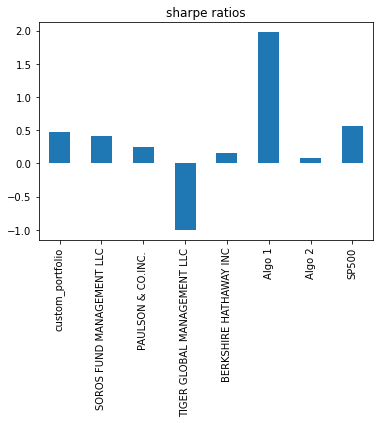

In [79]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
The custom portfolio 